In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### (1) 데이터 로드 및 확인

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 웅이네오돌뼈닭발도_전처리.csv to 웅이네오돌뼈닭발도_전처리 (2).csv


In [ ]:
review = pd.read_csv('웅이네오돌뼈닭발도_전처리.csv', sep = ',')
review

,Unnamed: 0,category,store,id,review_spell_check,star
0,0,한식,웅이네오돌뼈닭발도-금정동,ra**님,처음 시켜봤는데 너무 맛있어요 엄마랑 제가 워낙 잘 먹어서 양이 적을 줄 알았는데 ...,5
1,1,한식,웅이네오돌뼈닭발도-금정동,pc**님,먹다 보니 사진을 못 찍었습니다 맛 좋고 잘 먹었어요,5
2,2,한식,웅이네오돌뼈닭발도-금정동,he**님,맛있어요 또 시켜 목어야 자,5
3,3,한식,웅이네오돌뼈닭발도-금정동,je**님,맛읶게 잘 먹었네요 믿고 먹어요,5
4,4,한식,웅이네오돌뼈닭발도-금정동,ti**님,두 번째인데 오늘이 정말 맛있었어요,5
...,...,...,...,...,...,...
2225,2286,한식,웅이네오돌뼈닭발도-금정동,손님,맛있어요 맵기도 조절 잘해주셔서 정말 질 먹었습니다,5
2226,2287,한식,웅이네오돌뼈닭발도-금정동,손님,믿고 먹는 웅이네 친구들도 다들 만족해하네요,5
2227,2288,한식,웅이네오돌뼈닭발도-금정동,손님,맛도 없는 어묵이 너무 많이 들어있어요,3
2228,2289,한식,웅이네오돌뼈닭발도-금정동,손님,요기 요로 시키는 바람에 맛 조절을 못해서 너무 매웠지만 양도 많고 계란찜도 맛있었어요,4


- 결측치 확인 및 추가 제거

In [ ]:
review.isnull().sum() # NULL 값 유무 확인

Unnamed: 0             0
category               0
store                  0
id                     0
review_spell_check    29
star                   0
dtype: int64

In [ ]:
review = review.dropna(axis=0) # NULL 값이 있는 행 제거
print(review.isnull().sum()) # NULL 값 유무 재확인

Unnamed: 0            0
category              0
store                 0
id                    0
review_spell_check    0
star                  0
dtype: int64


In [ ]:
# 데이터 확인
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2229
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          2201 non-null   int64 
 1   category            2201 non-null   object
 2   store               2201 non-null   object
 3   id                  2201 non-null   object
 4   review_spell_check  2201 non-null   object
 5   star                2201 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 120.4+ KB


### (2) 한국어 텍스트 처리

In [ ]:
# 분석에 필요한 변수만 불러오기
review_data = review.loc[:, ["review_spell_check", "star"]]
review_data

,review_spell_check,star
0,처음 시켜봤는데 너무 맛있어요 엄마랑 제가 워낙 잘 먹어서 양이 적을 줄 알았는데 ...,5
1,먹다 보니 사진을 못 찍었습니다 맛 좋고 잘 먹었어요,5
2,맛있어요 또 시켜 목어야 자,5
3,맛읶게 잘 먹었네요 믿고 먹어요,5
4,두 번째인데 오늘이 정말 맛있었어요,5
...,...,...
2225,맛있어요 맵기도 조절 잘해주셔서 정말 질 먹었습니다,5
2226,믿고 먹는 웅이네 친구들도 다들 만족해하네요,5
2227,맛도 없는 어묵이 너무 많이 들어있어요,3
2228,요기 요로 시키는 바람에 맛 조절을 못해서 너무 매웠지만 양도 많고 계란찜도 맛있었어요,4


In [ ]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2201 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_spell_check  2201 non-null   object
 1   star                2201 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.6+ KB


In [ ]:
# 정규 표현식 함수 정의
import re

def apply_regular_expression(review_spell_check):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1개)를 포함한 한글
    result = hangul.sub('', review_spell_check)  # 위에 설정한 "hangul"규칙을 "review_spell_check"에 적용(.sub)시킴
    return result

In [ ]:
apply_regular_expression(review_data['review_spell_check'][118]) # 확인

'맛있어요 매콤하게 잘 먹었습니다'

- 형태소 분석 - 명사 단위

In [ ]:
# 형태소 분석에 필요한 라이브러리 Konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from collections import Counter

# 명사 형태소 추출 함수
okt = Okt()
kkma = Kkma()
hannanum = Hannanum()

In [ ]:
# okt 채택
nouns = okt.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns

['매콤']

In [ ]:
nouns2 = kkma.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns2

[]

In [ ]:
nouns3 = hannanum.nouns(apply_regular_expression(review_data['review_spell_check'][118]))
nouns3

['매콤하']

In [ ]:
# 말뭉치 생성
corpus = "".join(review_data['review_spell_check'].tolist())
corpus

'처음 시켜봤는데 너무 맛있어요 엄마랑 제가 워낙 잘 먹어서 양이 적을 줄 알았는데 정말 배부르게 먹었습니다 매운 거 못 드시는 분들은 쿨피스나 계란찜 더 시키시는 게 좋을 것 같아요먹다 보니 사진을 못 찍었습니다 맛 좋고 잘 먹었어요맛있어요 또 시켜 목어야 자맛읶게 잘 먹었네요 믿고 먹어요 두 번째인데 오늘이  정말 맛있었어요양파가 덜 익어서 매웠어요 그거 빼고는 맛있어요 너무 배고파서 한 컷 만항상 잘 먹고 있습니다 맛있어요말해 뭐 해 너무 맛있었어요배송도 빠르고 양도 푸짐하도 맛있네요 잘 먹었습니다_____양파가 너무 많아요맛있어요 고기가 괜찮아요 비계 너무 많이 있으면 싫은데 거의 없고 맛있었어요밥이 너무 질어 김가루랑 비벼지지도 않고 떡 같아요 계란찜이 아니라 계란 국이네요 가격을 좀 올리더라도 제대로 해주심 좋겠네요 오도독뼈도 느끼하고 매콤한 맛도 없고 맛있는 한 끼 기대했는데 틀렸네요무뼈닭발 매콤하고 맛있어요 음료는 콜라나 사이다로 선택할 수 있으면 좋겠어요맛있게 잘 먹었습니다 야식으로 먹으면 넘고 맛있어요계란 국 그제가 아는 그 계란찜이 아니고 약간 계란 국이 왔네요 잘못 만든 게 딱 봐도 보였을 텐데 그냥 보내주셨네요🤦\u200d♀️여기 계란찜 때문에 시키는 건데\U0001f972배달 감사합니다 맛있겜었어요첨 먹어봤는데 존 만불 향도 나고 맛은 괜찮습니다오돌뼈에가 맛있어서 기대치가 높아서인지 생각보다는 기대치에 못 미치는 것 같습니다너무 맛있게 먹었어요 하나도 안 남기고 다 먹어서 배가 터지려고 해요맛있네요 추천합니다원래 이런 거 잘 안 남기는데 너무 죄송한 마음에 리뷰 남깁니다  영업 마감시간 때쯤 주문을 한 것도 죄송한데 깜빡 잠이 들어 배달기사분도 사장님도 30분이나 기다려주셨더라고요 너무 화나셨을 텐데 기사분도 사장님도 화 한번 내시지 않고 웃으시면서 다시 보내주셨습니다 너무 죄송합니다 그리고 너무 감사합니다 신랑이 그 시간에 끝나는데 너무 먹고 싶다고 하여서 시켰는데 맛도 너무 좋았고요 불 향도 좋았고요 그리고 정말 친절하신 사장님과 

In [ ]:
# 정규 표현식 적용
apply_regular_expression(corpus)

'처음 시켜봤는데 너무 맛있어요 엄마랑 제가 워낙 잘 먹어서 양이 적을 줄 알았는데 정말 배부르게 먹었습니다 매운 거 못 드시는 분들은 쿨피스나 계란찜 더 시키시는 게 좋을 것 같아요먹다 보니 사진을 못 찍었습니다 맛 좋고 잘 먹었어요맛있어요 또 시켜 목어야 자맛읶게 잘 먹었네요 믿고 먹어요 두 번째인데 오늘이  정말 맛있었어요양파가 덜 익어서 매웠어요 그거 빼고는 맛있어요 너무 배고파서 한 컷 만항상 잘 먹고 있습니다 맛있어요말해 뭐 해 너무 맛있었어요배송도 빠르고 양도 푸짐하도 맛있네요 잘 먹었습니다양파가 너무 많아요맛있어요 고기가 괜찮아요 비계 너무 많이 있으면 싫은데 거의 없고 맛있었어요밥이 너무 질어 김가루랑 비벼지지도 않고 떡 같아요 계란찜이 아니라 계란 국이네요 가격을 좀 올리더라도 제대로 해주심 좋겠네요 오도독뼈도 느끼하고 매콤한 맛도 없고 맛있는 한 끼 기대했는데 틀렸네요무뼈닭발 매콤하고 맛있어요 음료는 콜라나 사이다로 선택할 수 있으면 좋겠어요맛있게 잘 먹었습니다 야식으로 먹으면 넘고 맛있어요계란 국 그제가 아는 그 계란찜이 아니고 약간 계란 국이 왔네요 잘못 만든 게 딱 봐도 보였을 텐데 그냥 보내주셨네요여기 계란찜 때문에 시키는 건데배달 감사합니다 맛있겜었어요첨 먹어봤는데 존 만불 향도 나고 맛은 괜찮습니다오돌뼈에가 맛있어서 기대치가 높아서인지 생각보다는 기대치에 못 미치는 것 같습니다너무 맛있게 먹었어요 하나도 안 남기고 다 먹어서 배가 터지려고 해요맛있네요 추천합니다원래 이런 거 잘 안 남기는데 너무 죄송한 마음에 리뷰 남깁니다  영업 마감시간 때쯤 주문을 한 것도 죄송한데 깜빡 잠이 들어 배달기사분도 사장님도 분이나 기다려주셨더라고요 너무 화나셨을 텐데 기사분도 사장님도 화 한번 내시지 않고 웃으시면서 다시 보내주셨습니다 너무 죄송합니다 그리고 너무 감사합니다 신랑이 그 시간에 끝나는데 너무 먹고 싶다고 하여서 시켰는데 맛도 너무 좋았고요 불 향도 좋았고요 그리고 정말 친절하신 사장님과 기사님 덕분에 더 맛있었습니다 감사하고 죄송합니

In [ ]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

['처음', '엄마', '제', '워낙', '양', '적', '줄', '정말', '거', '못', '분', '쿨', '피스', '계란찜', '더', '게', '것', '사진', '못', '맛', '또', '목어', '자맛읶', '두', '번', '오늘이', '정말', '양파', '덜', '그거', '컷', '항상', '뭐', '해', '배송', '양도', '양파', '고기', '비계', '거의', '밥', '김', '가루', '떡', '계란찜', '계란', '국', '요', '가격', '좀', '제대로', '해', '주심', '오도독뼈', '매콤', '맛', '끼', '무뼈', '닭발', '매콤', '음료', '콜라', '사이다', '선택', '수', '야식', '계란', '국', '제', '그', '계란찜', '약간', '계란', '국', '잘못', '게', '그냥', '여기', '계란찜', '때문', '건데', '배달', '겜었', '존', '불', '향', '맛', '돌뼈', '치가', '인지', '생각', '대치', '못', '것', '하나', '안', '배', '해', '추천', '원래', '거', '안', '마음', '리뷰', '영업', '마감', '시간', '때', '주문', '것', '깜빡', '잠', '배달', '기사', '사장', '분', '기사', '사장', '화', '한번', '내시', '다시', '신랑', '그', '시간', '맛', '불', '향', '정말', '사장', '기사', '덕분', '더', '번창', '부모님', '주꾸미', '개인', '잔', '조화', '맛', '이', '좀', '계란찜', '정말', '일단', '먹기', '사진', '못', '뼈', '무덤', '거', '정신', '맛', '요', '국물', '닭발', '웅', '주문', '계란찜', '추가', '거', '못', '보통', '맛', '매콤', '배달', '음식', '오늘', '수고', '요기', '주문', '왜', '리뷰', '침', '건', '요청', '

- 불용어 사전

In [ ]:
# 기본 불용어
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

[['휴'],
 ['아이구'],
 ['아이쿠'],
 ['아이고'],
 ['어'],
 ['나'],
 ['우리'],
 ['저희'],
 ['따라'],
 ['의해']]

In [ ]:
# 배달 리뷰에 필요없는 불용어 사전에 추가
review_stopwords = ['사진', '진짜' ,'여기', '식구', '그냥', '올해', '예상', '역시', '항상', '매번',
                    '계속', '시간', '정함', '수정', '아주', '혼자', '다음', '거의', '후기', '무슨',
                    '중간', '안산', '나름', '아저씨', '다시', '수고', '만약', '오늘', '살짝', '번창',
                    '예정', '분도', '다른', '런가']

for word in review_stopwords:
    stopwords.append(word)

- BoW(Bag of Words) 벡터 생성

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(reivew_spell_check):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', reivew_spell_check)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(review_data['review_spell_check'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
# 단어 리스트 출력
word_list

['가게',
 '가격',
 '가까이',
 '가끔',
 '가능',
 '가닥',
 '가득',
 '가라',
 '가락국수',
 '가루',
 '가성',
 '가신',
 '가요',
 '가장',
 '가족',
 '가지',
 '간도',
 '간이',
 '간장',
 '간퍈한거',
 '간혹',
 '갈비',
 '갈수록',
 '감동',
 '감사',
 '감안',
 '감자',
 '감정',
 '감칠맛',
 '갑자기',
 '강도',
 '강아지',
 '강추',
 '개꿀띠',
 '개도',
 '개봉',
 '개선',
 '개요',
 '개인',
 '개존맛',
 '거가',
 '거구',
 '거기',
 '거나',
 '거듭',
 '거리',
 '거만',
 '거시',
 '거임',
 '거지',
 '거짓말',
 '걱정',
 '건가',
 '건강',
 '검색',
 '검정',
 '게다가',
 '게로',
 '겜었',
 '겟숩',
 '겨를',
 '겨속',
 '겨찮을듯',
 '결론',
 '결제',
 '결혼',
 '경사',
 '계란',
 '계란찜',
 '계시',
 '고가',
 '고급',
 '고기',
 '고대로',
 '고두밥',
 '고등학생',
 '고려',
 '고무',
 '고민',
 '고생',
 '고속',
 '고요',
 '고정',
 '고춧가루',
 '골목',
 '곳도',
 '공기',
 '공항',
 '과자',
 '과정',
 '관련',
 '관찮네',
 '관할',
 '구래',
 '구리',
 '구매',
 '구색',
 '구성',
 '구슬',
 '구이',
 '국무',
 '국물',
 '국수',
 '군오',
 '군포',
 '굿굿',
 '굿굿굿',
 '굿굿굿굿굿굿굿굿굿굿',
 '굿굿굿굿굿굿굿굿굿굿굿굿굿굿굿굿굿굿굿굿',
 '굿굿굿담',
 '굿이어',
 '궁리',
 '궁합',
 '권장',
 '그거',
 '그것',
 '그게',
 '그날',
 '그다지',
 '그대로',
 '그동안',
 '그때',
 '그땐',
 '그랴',
 '그뤠잇얇',
 '그릇',
 '그저께',
 '근래',
 '근방',
 '근처',
 '글쎄요',
 '글씨체',
 '글자',
 '금방',
 

In [ ]:
# 각 단어가 전체 리뷰중에 등장한 총 횟수
count_list

array([ 3, 20,  1, ...,  1,  2,  1])

In [ ]:
# 각 단어의 리뷰별 등장 횟수
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
bow_vect.shape

(2201, 1240)

In [ ]:
# "단어" - "총 등장 횟수" Matching

word_count_dict = dict(zip(word_list, count_list))
word_count_dict

{'가게': 3,
 '가격': 20,
 '가까이': 1,
 '가끔': 15,
 '가능': 1,
 '가닥': 1,
 '가득': 2,
 '가라': 2,
 '가락국수': 5,
 '가루': 11,
 '가성': 2,
 '가신': 1,
 '가요': 1,
 '가장': 3,
 '가족': 5,
 '가지': 2,
 '간도': 2,
 '간이': 9,
 '간장': 1,
 '간퍈한거': 1,
 '간혹': 1,
 '갈비': 1,
 '갈수록': 3,
 '감동': 6,
 '감사': 2,
 '감안': 1,
 '감자': 2,
 '감정': 1,
 '감칠맛': 1,
 '갑자기': 1,
 '강도': 1,
 '강아지': 1,
 '강추': 11,
 '개꿀띠': 1,
 '개도': 2,
 '개봉': 1,
 '개선': 1,
 '개요': 1,
 '개인': 12,
 '개존맛': 1,
 '거가': 2,
 '거구': 1,
 '거기': 2,
 '거나': 1,
 '거듭': 1,
 '거리': 2,
 '거만': 2,
 '거시': 1,
 '거임': 3,
 '거지': 1,
 '거짓말': 2,
 '걱정': 4,
 '건가': 5,
 '건강': 1,
 '검색': 1,
 '검정': 1,
 '게다가': 1,
 '게로': 1,
 '겜었': 1,
 '겟숩': 1,
 '겨를': 1,
 '겨속': 1,
 '겨찮을듯': 1,
 '결론': 1,
 '결제': 4,
 '결혼': 2,
 '경사': 1,
 '계란': 17,
 '계란찜': 187,
 '계시': 1,
 '고가': 1,
 '고급': 1,
 '고기': 16,
 '고대로': 1,
 '고두밥': 1,
 '고등학생': 1,
 '고려': 1,
 '고무': 1,
 '고민': 9,
 '고생': 2,
 '고속': 1,
 '고요': 7,
 '고정': 1,
 '고춧가루': 2,
 '골목': 1,
 '곳도': 1,
 '공기': 1,
 '공항': 1,
 '과자': 1,
 '과정': 1,
 '관련': 1,
 '관찮네': 1,
 '관할': 1,
 '구래': 1,
 '구리': 6,
 '구매': 1,
 '구색': 1

- TF-IDF 변환

In [ ]:
#Bag of Words 벡터에 대해서 TF-IDF변환
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

(2201, 1240)


In [ ]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 1166)	0.3664891649764713
  (0, 1053)	0.3388692843170066
  (0, 950)	0.3147263135089213
  (0, 817)	0.5375247474820909
  (0, 720)	0.5375247474820909
  (0, 68)	0.2719098000717178


In [ ]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 1240)
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# “벡터” - “단어” mapping
vect.vocabulary_

{'처음': 1053,
 '엄마': 720,
 '워낙': 817,
 '정말': 950,
 '피스': 1166,
 '계란찜': 68,
 '목어': 404,
 '맛읶': 363,
 '오늘이': 758,
 '양파': 697,
 '그거': 114,
 '배송': 455,
 '양도': 692,
 '고기': 72,
 '비계': 516,
 '가루': 9,
 '계란': 67,
 '가격': 1,
 '제대로': 958,
 '주심': 991,
 '오도독뼈': 761,
 '매콤': 373,
 '무뼈': 412,
 '닭발': 250,
 '음료': 828,
 '콜라': 1104,
 '사이다': 539,
 '선택': 566,
 '야식': 685,
 '약간': 687,
 '잘못': 902,
 '때문': 304,
 '배달': 453,
 '겜었': 58,
 '돌뼈': 284,
 '치가': 1092,
 '인지': 871,
 '생각': 559,
 '대치': 272,
 '하나': 1169,
 '추천': 1086,
 '원래': 818,
 '마음': 344,
 '리뷰': 333,
 '영업': 747,
 '마감': 334,
 '주문': 985,
 '깜빡': 164,
 '기사': 150,
 '사장': 542,
 '한번': 1177,
 '내시': 201,
 '신랑': 640,
 '덕분': 277,
 '부모님': 494,
 '주꾸미': 980,
 '개인': 38,
 '조화': 973,
 '일단': 872,
 '먹기': 385,
 '무덤': 407,
 '정신': 952,
 '국물': 101,
 '추가': 1084,
 '보통': 481,
 '음식': 830,
 '기대': 143,
 '요청': 805,
 '사항': 543,
 '주먹밥': 984,
 '신라면': 639,
 '사람': 533,
 '바닥': 438,
 '지점': 1009,
 '참치': 1051,
 '마요네즈': 343,
 '치즈': 1093,
 '불닭': 508,
 '요다음': 794,
 '포장': 1156,
 '최고': 1073,
 '양념': 691,

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{1053: '처음', 720: '엄마', 817: '워낙', 950: '정말', 1166: '피스', 68: '계란찜', 404: '목어', 363: '맛읶', 758: '오늘이...


### (3) Modeling - Logistic Regression

- Target Data 감성 라벨링

In [ ]:
review_data.head()

,review_spell_check,star
0,처음 시켜봤는데 너무 맛있어요 엄마랑 제가 워낙 잘 먹어서 양이 적을 줄 알았는데 ...,5
1,먹다 보니 사진을 못 찍었습니다 맛 좋고 잘 먹었어요,5
2,맛있어요 또 시켜 목어야 자,5
3,맛읶게 잘 먹었네요 믿고 먹어요,5
4,두 번째인데 오늘이 정말 맛있었어요,5


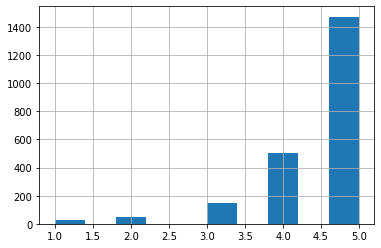

In [ ]:
# 별점 분포
review_data['star'].hist()
plt.show()

In [ ]:
# 별점별 리뷰 빈도
review_data["star"].value_counts()

5    1472
4     505
3     146
2      49
1      29
Name: star, dtype: int64

In [ ]:
# 별점 1~3개 : 부정
# 별점 4~5개 : 긍정
def star_to_label(star):
    if star > 3:
        return 1
    else:
        return 0
    
review_data['label'] = review_data['star'].apply(lambda x: star_to_label(x))

In [ ]:
review_data

,review_spell_check,star,label
0,처음 시켜봤는데 너무 맛있어요 엄마랑 제가 워낙 잘 먹어서 양이 적을 줄 알았는데 ...,5,1
1,먹다 보니 사진을 못 찍었습니다 맛 좋고 잘 먹었어요,5,1
2,맛있어요 또 시켜 목어야 자,5,1
3,맛읶게 잘 먹었네요 믿고 먹어요,5,1
4,두 번째인데 오늘이 정말 맛있었어요,5,1
...,...,...,...
2225,맛있어요 맵기도 조절 잘해주셔서 정말 질 먹었습니다,5,1
2226,믿고 먹는 웅이네 친구들도 다들 만족해하네요,5,1
2227,맛도 없는 어묵이 너무 많이 들어있어요,3,0
2228,요기 요로 시키는 바람에 맛 조절을 못해서 너무 매웠지만 양도 많고 계란찜도 맛있었어요,4,1


In [ ]:
# 감성별 리뷰 빈도
review_data["label"].value_counts()

1    1977
0     224
Name: label, dtype: int64

1    89.822808
0    10.177192
Name: label, dtype: float64


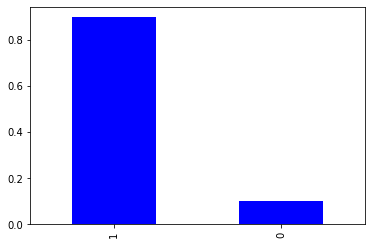

In [ ]:
# 긍정(1) & 부정(0) 비율
review_data["label"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(review_data["label"].value_counts(normalize=True)*100)

- train set & test set 분류

In [ ]:
# feature : tf_idf_vect(리뷰의 형태소와 중요도)
# target : label(별점에 따른 긍/부정)

from sklearn.model_selection import train_test_split

# 트레이닝 데이터, 테스트 데이터 설정
x = tf_idf_vect
y = review_data["label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

# 현재 트레이닝 데이터 확인
print("Before Sampling: ",Counter(y_train))

Before Sampling:  Counter({1: 1379, 0: 161})


- 모델 학습(Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in train set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
# 분류 결과 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.90
precision: 0.90
recall: 1.00
F1: 0.95


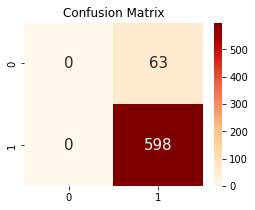

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

- 샘플링 재조정

In [ ]:
# 과적합(Overfitting)으로 인해 오버 샘플링(Over Sampling)
# OverSampling 방법 - SVMSMOTE

from imblearn.over_sampling import SVMSMOTE
SVMSMOTE = SVMSMOTE()
x_train_SVMSMOTE, y_train_SVMSMOTE = SVMSMOTE.fit_resample(x_train, y_train)
print("Before Sampling: ",Counter(y_train))
print("After oversampling(SVMSMOTE): ",Counter(y_train_SVMSMOTE))

Before Sampling:  Counter({1: 1379, 0: 161})
After oversampling(SVMSMOTE):  Counter({1: 1379, 0: 1379})


- 모델 재학습

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train_SVMSMOTE, y_train_SVMSMOTE)
y_pred = lr2.predict(x_test)

In [ ]:
# 분류 결과 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.86
precision: 0.92
recall: 0.94
F1: 0.93


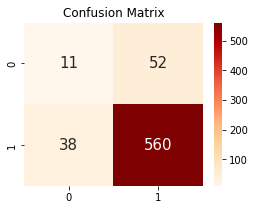

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

- 교차 검증(Cross Validation)

In [ ]:
# Target Data가 편향되었기 때문에 StratifiedKFold를 통해 교차 검증 실시
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

SK_fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=0)
score = cross_val_score(lr2, x_train_SVMSMOTE, y_train_SVMSMOTE, cv=SK_fold)

In [ ]:
print('검증 점수:', score)
print('평균 검증 점수:', round(score.mean(), 4))

검증 점수: [0.85942029 0.84347826 0.85050798 0.86357039]
평균 검증 점수: 0.8542


## (4) 감성분류 - 긍정 & 부정

- 모델로 리뷰 긍정 & 부정 분류




In [ ]:
proba = lr2.predict_proba(x)
y_pred = lr2.predict(x)
print(len(y_pred))
print(len(proba))
print(len(proba[0]))

2201
2201
2


In [ ]:
# 실제값과 예측값 비교
p_list = []
for p in proba:
    p_list.append(p[1])
p_list=np.round(p_list,3)
data=pd.DataFrame({
    '예측 확률':p_list,
    '예측 감성':y_pred,
    '실제 감성':y})
data

,예측 확률,예측 감성,실제 감성
0,0.945,1,1
1,0.762,1,1
2,0.797,1,1
3,0.762,1,1
4,0.847,1,1
...,...,...,...
2225,0.698,1,1
2226,0.855,1,1
2227,0.787,1,0
2228,0.888,1,1


In [ ]:
# 실제 & 예측 분류 데이터 빈도
print("예측 감성:",Counter(y_pred))
print("실제 감성:",Counter(y))

예측 감성: Counter({1: 1992, 0: 209})
실제 감성: Counter({1: 1977, 0: 224})


1    90.504316
0     9.495684
Name: 예측 감성, dtype: float64


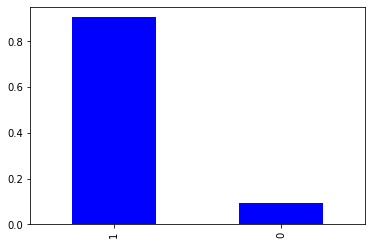

In [ ]:
data["예측 감성"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(data["예측 감성"].value_counts(normalize=True)*100)

1    89.822808
0    10.177192
Name: 실제 감성, dtype: float64


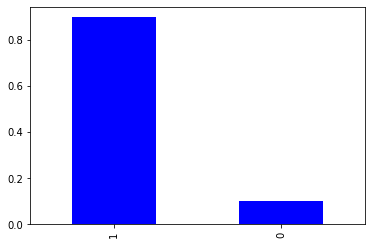

In [ ]:
data["실제 감성"].value_counts(normalize=True).plot(kind='bar', color = "blue")
print(data["실제 감성"].value_counts(normalize=True)*100)

## (5) 긍정 & 부정 키워드 분석

- 회귀 계수를 통한 긍정 & 부정 키워드 추출

In [ ]:
# Logistic Regression 모델에서 생성된 회귀계수 값
lr2.coef_

array([[0.07609141, 0.73256688, 0.28590239, ..., 0.05161505, 0.14000729,
        0.        ]])

<BarContainer object of 1240 artists>

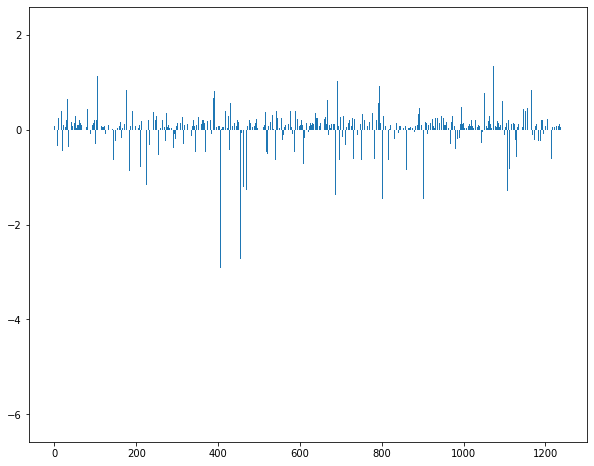

In [ ]:
# 회귀계수 값을 시각화
# 계수가 양인 경우는 긍정, 음인 경우는 부정
plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [ ]:
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환
# 회귀계수 값 상/하위 5개 정렬
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])

[(2.16890969730018, 68), (1.8105118248102385, 250), (1.3372670693812834, 1073), (1.260341716213651, 1093), (1.1661161562525586, 966)]
[(-2.72579047025668, 455), (-2.9055493423735532, 406), (-3.3855163510298216, 143), (-3.744186710662204, 508), (-6.160254955577116, 282)]


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(2.16890969730018, 68),
 (1.8105118248102385, 250),
 (1.3372670693812834, 1073),
 (1.260341716213651, 1093),
 (1.1661161562525586, 966),
 (1.1261896942343286, 105),
 (1.1009565498484597, 373),
 (1.0305857194971566, 692),
 (0.952297721585814, 1053),
 (0.9275520607113599, 805),
 (0.9087958788499255, 794),
 (0.8317613312872134, 1166),
 (0.8313564319095728, 176),
 (0.8203426756811559, 218),
 (0.8118636584654337, 391),
 (0.799980470144518, 950),
 (0.7937613814767742, 1033),
 (0.7885874108218943, 3),
 (0.7858175002988934, 97),
 (0.7836973534081924, 284),
 (0.76667025011628, 1051),
 (0.7354693121873664, 1169),
 (0.7325668799789516, 1),
 (0.7256730895381683, 891),
 (0.7143426852976003, 432),
 (0.7083273738471987, 542),
 (0.7011799457964936, 964),
 (0.6922942452984583, 261),
 (0.6746623744093521, 674),
 (0.6699094266147118, 389),
 (0.6539534169110578, 920),
 (0.6510653128307079, 341),
 (0.6485716396792673, 1167),
 (0.6351483894376183, 32),
 (0.6321998524918465, 974),
 (0.6248328904876467, 667)

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{1053: '처음',
 720: '엄마',
 817: '워낙',
 950: '정말',
 1166: '피스',
 68: '계란찜',
 404: '목어',
 363: '맛읶',
 758: '오늘이',
 697: '양파',
 114: '그거',
 455: '배송',
 692: '양도',
 72: '고기',
 516: '비계',
 9: '가루',
 67: '계란',
 1: '가격',
 958: '제대로',
 991: '주심',
 761: '오도독뼈',
 373: '매콤',
 412: '무뼈',
 250: '닭발',
 828: '음료',
 1104: '콜라',
 539: '사이다',
 566: '선택',
 685: '야식',
 687: '약간',
 902: '잘못',
 304: '때문',
 453: '배달',
 58: '겜었',
 284: '돌뼈',
 1092: '치가',
 871: '인지',
 559: '생각',
 272: '대치',
 1169: '하나',
 1086: '추천',
 818: '원래',
 344: '마음',
 333: '리뷰',
 747: '영업',
 334: '마감',
 985: '주문',
 164: '깜빡',
 150: '기사',
 542: '사장',
 1177: '한번',
 201: '내시',
 640: '신랑',
 277: '덕분',
 494: '부모님',
 980: '주꾸미',
 38: '개인',
 973: '조화',
 872: '일단',
 385: '먹기',
 407: '무덤',
 952: '정신',
 101: '국물',
 1084: '추가',
 481: '보통',
 830: '음식',
 143: '기대',
 805: '요청',
 543: '사항',
 984: '주먹밥',
 639: '신라면',
 533: '사람',
 438: '바닥',
 1009: '지점',
 1051: '참치',
 343: '마요네즈',
 1093: '치즈',
 508: '불닭',
 794: '요다음',
 1156: '포장',
 1073: '최고',
 691: '양념',

In [ ]:
# 긍정 키워드 5개 출력
for coef in coef_pos_index[:5]:
    print(invert_index_vectorizer[coef[1]], coef[0]) 

계란찜 2.16890969730018
닭발 1.8105118248102385
최고 1.3372670693812834
치즈 1.260341716213651
조금 1.1661161562525586


In [ ]:
# 부정 키워드 5개 출력
for coef in coef_neg_index[:5]:
    print(invert_index_vectorizer[coef[1]], coef[0])

도착 -6.160254955577116
불닭 -3.744186710662204
기대 -3.3855163510298216
무난 -2.9055493423735532
배송 -2.72579047025668
